In [1]:
import requests
import matplotlib.pyplot as plt
def getGithubUserRepos( uname ):
    return "https://api.github.com/users/" + uname + "/repos"

In [2]:
myUsername = "zigpot"
myGithubUserRepoRequest = getGithubUserRepos(myUsername)

In [3]:
# TODO: Overcome low rate limit using authentication, ref: https://docs.github.com/en/apps/creating-github-apps/creating-github-apps/rate-limits-for-github-apps
response = requests.get(myGithubUserRepoRequest)

In [4]:
# TODO: Handle response error (using try catch)
def getLangsStat(response, ignoreForks=True):
    langs = {}
    if(response.status_code == 200):
        print("success!")
        print(response.json())
        for item in response.json():
            langResponse = requests.get(item['languages_url']);
            isForked = item['fork'];
            if(langResponse.status_code == 200):
                if(not(ignoreForks and isForked)):
                    print(langs)
                    A = langs
                    B = langResponse.json()
                    c = {x: A.get(x, 0) + B.get(x, 0) for x in set(A).union(B)}
                    langs = c
    else:
        # TODO: response error
        print("failed with status code: ", response.status_code)
        print(response.reason)
    return langs

In [5]:
langs = getLangsStat(response, ignoreForks=False)

sortedLangsRev = dict(sorted(langs.items(), key = lambda x: x[1], reverse=True))

success!
[{'id': 411877225, 'node_id': 'R_kgDOGIy_aQ', 'name': 'Arduino', 'full_name': 'zigpot/Arduino', 'private': False, 'owner': {'login': 'zigpot', 'id': 16068753, 'node_id': 'MDQ6VXNlcjE2MDY4NzUz', 'avatar_url': 'https://avatars.githubusercontent.com/u/16068753?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/zigpot', 'html_url': 'https://github.com/zigpot', 'followers_url': 'https://api.github.com/users/zigpot/followers', 'following_url': 'https://api.github.com/users/zigpot/following{/other_user}', 'gists_url': 'https://api.github.com/users/zigpot/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/zigpot/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/zigpot/subscriptions', 'organizations_url': 'https://api.github.com/users/zigpot/orgs', 'repos_url': 'https://api.github.com/users/zigpot/repos', 'events_url': 'https://api.github.com/users/zigpot/events{/privacy}', 'received_events_url': 'https://api.github.com/users/zigpot/rece

{}
{'CSS': 205, 'Shell': 40584, 'C++': 3922538, 'Python': 187697, 'Makefile': 21314, 'HTML': 60044, 'C': 2156099, 'Assembly': 21852}
{'CSS': 205, 'Haskell': 596, 'Shell': 40584, 'C++': 3922538, 'Python': 187697, 'Makefile': 21314, 'HTML': 60044, 'C': 2156099, 'Assembly': 21852}
{'CSS': 205, 'Haskell': 596, 'Shell': 40584, 'C++': 3922538, 'Python': 187697, 'Makefile': 21314, 'HTML': 60044, 'C': 2156099, 'Assembly': 21852}
{'CSS': 205, 'Haskell': 596, 'Shell': 40584, 'C++': 3950782, 'Python': 187697, 'Makefile': 21802, 'HTML': 60044, 'Cuda': 28924, 'C': 2162203, 'Assembly': 21852}
{'CSS': 205, 'Haskell': 596, 'Shell': 40584, 'C++': 3950782, 'Python': 187697, 'Makefile': 21802, 'HTML': 60044, 'Cuda': 28924, 'C': 2162203, 'Assembly': 21852}
{'CSS': 205, 'Haskell': 596, 'Shell': 40584, 'C++': 3950782, 'Python': 187697, 'Makefile': 21802, 'Ruby': 726, 'HTML': 60044, 'Cuda': 28924, 'C': 2162203, 'Assembly': 21852}
{'CSS': 739, 'Haskell': 596, 'Shell': 40837, 'JavaScript': 17830, 'C++': 395078

In [6]:
langs

{'PHP': 16527272,
 'C#': 43897,
 'SCSS': 315898,
 'Haskell': 596,
 'Dockerfile': 1004,
 'Smalltalk': 302,
 'Python': 187697,
 'Ruby': 726,
 'HTML': 68100,
 'Jupyter Notebook': 72790,
 'TypeScript': 10277,
 'CSS': 4692629,
 'Shell': 40837,
 'JavaScript': 5380716,
 'C++': 3979070,
 'Makefile': 21802,
 'Cuda': 28924,
 'CMake': 10057,
 'C': 2188723,
 'Assembly': 21852}

In [7]:
print(sortedLangsRev)

{'PHP': 16527272, 'JavaScript': 5380716, 'CSS': 4692629, 'C++': 3979070, 'C': 2188723, 'SCSS': 315898, 'Python': 187697, 'Jupyter Notebook': 72790, 'HTML': 68100, 'C#': 43897, 'Shell': 40837, 'Cuda': 28924, 'Assembly': 21852, 'Makefile': 21802, 'TypeScript': 10277, 'CMake': 10057, 'Dockerfile': 1004, 'Ruby': 726, 'Haskell': 596, 'Smalltalk': 302}


In [8]:
import json

# https://raw.githubusercontent.com/ozh/github-colors/master/colors.json
f = open('colors.json')

githubLangColors = json.load(f)

In [9]:
import random

def getRandomColor():
    color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    return color


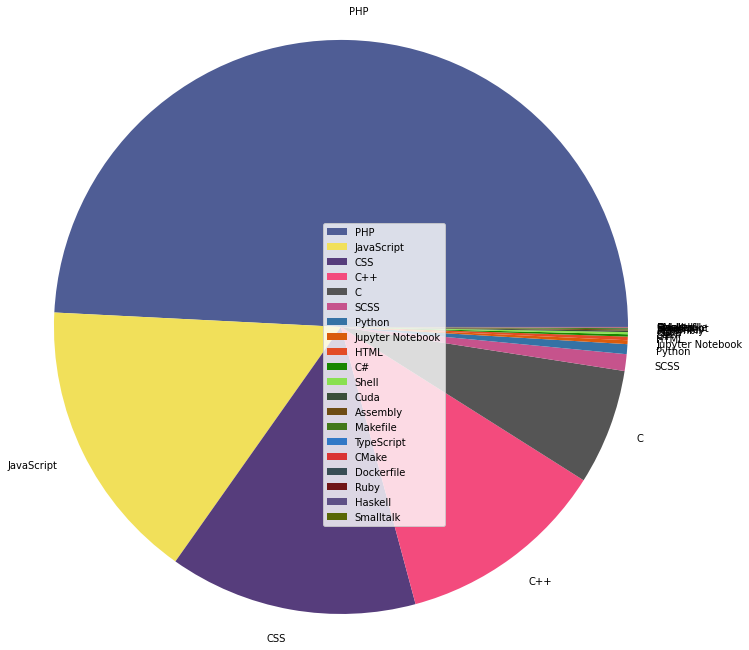

In [10]:
langsLabels = list(sortedLangsRev.keys())
langsValues = list(sortedLangsRev.values())
langsColors = []
for lang in langsLabels:
    color = ''
    if lang in githubLangColors:
        color =githubLangColors[lang]['color']
        #print(f'{lang} {color}')
    else:
        color = langsColors.append(getRandomColor())
        #print(f'{lang} {color} (color not found, randomly assigned)')
    langsColors.append(color)
    
patches, text = plt.pie(langsValues, labels=langsLabels, radius=3.3, colors=langsColors)
plt.legend(patches, langsLabels, loc="best")
plt.show()

In [11]:
langsLabels[5]

'SCSS'